<a href="https://colab.research.google.com/github/martuscellifaria/MachineLearning/blob/main/15_Grouping_customers_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Grouping customers using k-means clustering**
A company wants to know which types of shopping mall customers have higher spending potential, with higher accuracy. The company identifies the most decisive parameters as annual income and spending score. We'll use the k-means clustering model.
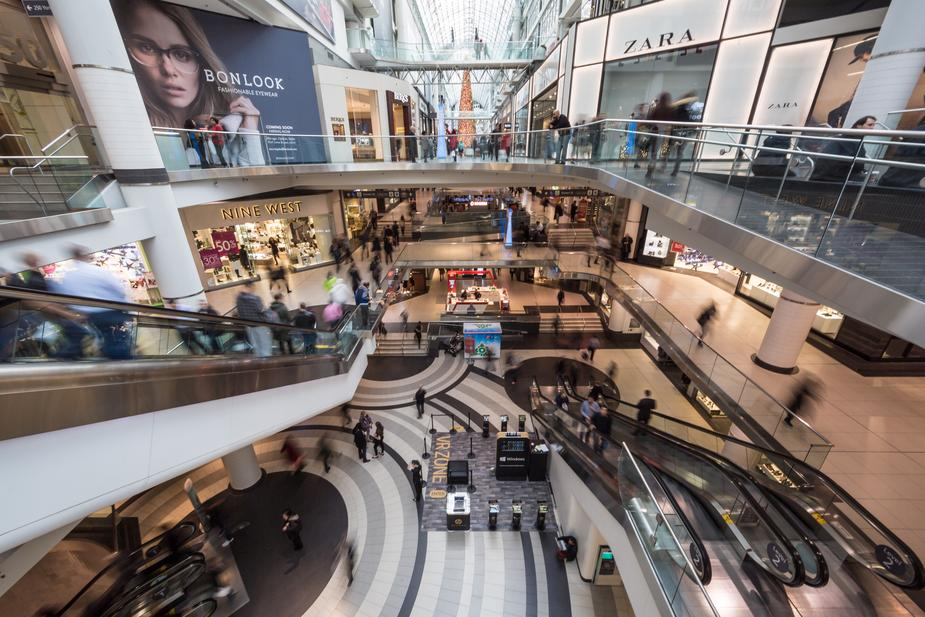


#**01. Importing libraries**
Once again, the needed libraries follow:

*   Numpy - Perform mathematical operations;
*   Pandas - Perform data manipulation and analysis;
*   Matplotlib - Library for plotting and visualizing data.



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **02. Loading data from a .csv file**
Let us load the Mall_Customers.csv file and allocate their columns to vector X. We will use the *.head() to show the first five entries of the table.

In [9]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Study Datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **03. Using an elbow method to find the optimal number of clusters**
We'll use the elbow method to find the optimal number of clusters. For this to work out, we'll be using the scipy library ***scipy.cluster***.

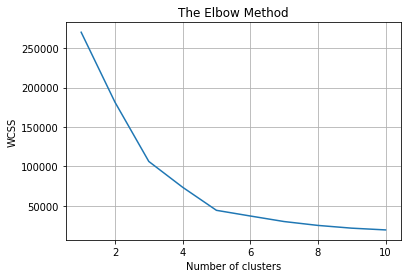

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

#**04. Applying the k-means clustering model on the dataset**
For that, we'll use the number of clusters given by the last change on the elbow method curve derivative.

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#**05. Visualizing the clusters**
We'll visualize the information retrieved and obtain a pattern of consumers.

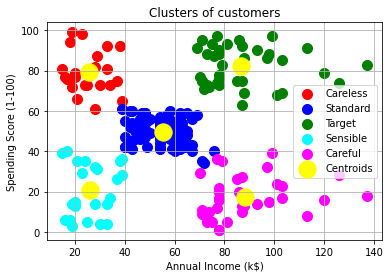

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(which='major')
plt.grid(which='minor')
plt.legend()
plt.show()

#**06. Conclusion**
The outcome obtained is an indicative that the k-means clustering is a great model for the studied case.